In [15]:
from pathlib import Path
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Features Analysis

In [3]:
path = Path("outputs","spotify_and_features.csv")
spotify_df = pd.read_csv(path)
spotify_df

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4,0.3230,0.826,0.773,0.773,0.773,0.0524,126.899,11,-4.218,0,4,0.761
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m,0.1100,0.737,0.860,0.860,0.860,0.0593,93.989,8,-2.652,0,4,0.656
2,Te Vi,Piso 21,231848,80,2018-12-14,059bcIhyc2SBwm6sw2AZzd,0.0446,0.877,0.777,0.777,0.777,0.1170,102.020,1,-4.246,1,4,0.706
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr,0.1360,0.746,0.700,0.700,0.700,0.3410,176.044,0,-4.669,1,4,0.619
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI,0.6000,0.610,0.624,0.624,0.624,0.3090,176.169,2,-4.773,1,4,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Un Ratito,Bad Bunny,176936,82,2022-05-06,5CzixCxDkRXX9mScCmah8O,0.3050,0.787,0.546,0.546,0.546,0.0532,93.050,0,-7.094,0,4,0.222
231,Si Fuera Fácil,Grupo Marca Registrada,170496,77,2022-05-27,7Jph6HJbfURt4Fea19IED3,0.4460,0.794,0.677,0.677,0.677,0.0713,101.467,10,-9.969,1,3,0.611
232,Dos Mil 16,Bad Bunny,208615,81,2022-05-06,4d4ZXH4dr5bYfgErHiZCX2,0.1230,0.817,0.670,0.670,0.670,0.0506,130.058,1,-6.534,1,3,0.495
233,Siempre Pendientes,Peso Pluma,186828,85,2022-08-15,3gfSH9aYZbyGjdmbeoWliw,0.3310,0.774,0.748,0.748,0.748,0.0352,135.929,0,-7.086,1,3,0.714


In [4]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, line_place):
    slope, y_intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    reg_values = x_values * slope + y_intercept
    line = f"Y = {str(round(slope , 2))} + X + {str(round(y_intercept, 2))}"
    plt.scatter(x_values, y_values, facecolor = "blue", edgecolor = "black")
    plt.plot(x_values, reg_values, color = "red")
    plt.annotate(line, line_place, color = "green", fontsize = 12 )
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()
    print(str(title))
    print(f"The r value is: {rvalue}")

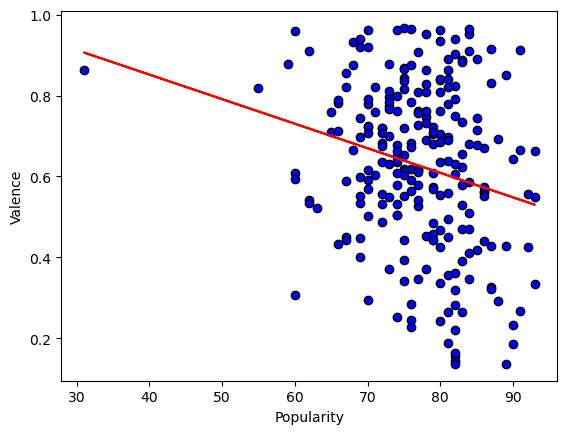

Popularity vs. Valence
The r value is: -0.23111792281950377


In [5]:
x_values = spotify_df["Popularity"]
y_values = spotify_df["Valence"]

lin_reg(x_values, y_values, "Popularity vs. Valence", (0, 0))

# Lyrics Analysis

In [6]:
path = Path("outputs","FINAL.csv")
lyrics_df = pd.read_csv(path)
lyrics_df

,Words,Frequency
0,no,19
1,baby,17
2,remix,15
3,do,12
4,dice,12
...,...,...
987,ill,3
988,ilusión,3
989,infeliz,3
990,interludio,3


In [7]:
TOP_20_WORDS=lyrics_df.iloc[:20,:]
TOP_20_WORDS.set_index("Words", inplace=True)
TOP_20_WORDS

,Frequency
Words,
no,19
baby,17
remix,15
do,12
dice,12
fue,12
tú,11
pero,11
go,10


Text(0, 0.5, 'Frequency')

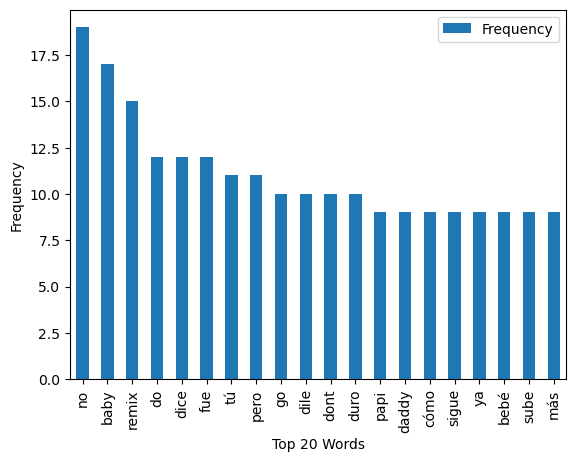

In [8]:
words_bar_chart = TOP_20_WORDS.plot.bar()
plt.xlabel("Top 20 Words")
plt.ylabel("Frequency")


## Words in Songs Statistics

In [9]:
path = Path("outputs","words_in_songs.csv")
words_df = pd.read_csv(path)
words_df

,Song,Lyrics
0,11 PM,"['8', 'contributors11', 'pm', 'lyrics[letra', ..."
1,2/Catorce,"['7', 'contributorstranslationsenglish2/catorc..."
2,7 rings,"['473', 'contributorstranslationstürkçeespañol..."
3,A La Antigüita,"['4', 'contributorsa', 'la', 'antigüita', 'lyr..."
4,A Través del Vaso,"['6', 'contributorsa', 'través', 'del', 'vaso'..."
...,...,...
228,bad guy,"['339', 'contributorstranslationshrvatskitürkç..."
229,death bed (coffee for your head),"['168', 'contributorstranslationstürkçeespañol..."
230,drivers license,"['390', 'contributorstranslationstürkçeespañol..."
231,telepatía,"['77', 'contributorstranslationsportuguês日本語de..."


In [52]:
words_df['Lyrics'] = words_df['Lyrics'].astype(str)
#creating empty column
words_df["Number of Words"]=""
#counting number of words separated by ","
words_df["Number of Words"]=words_df["Lyrics"].apply(lambda n: len(n.split(',')))
index_drop = 12
# words_df = words_df.drop(index_drop)
words_df

,Song,Lyrics,Number of Words
0,11 PM,"['8', 'contributors11', 'pm', 'lyrics[letra', ...",444
1,2/Catorce,"['7', 'contributorstranslationsenglish2/catorc...",421
2,7 rings,"['473', 'contributorstranslationstürkçeespañol...",574
3,A La Antigüita,"['4', 'contributorsa', 'la', 'antigüita', 'lyr...",205
4,A Través del Vaso,"['6', 'contributorsa', 'través', 'del', 'vaso'...",202
...,...,...,...
228,bad guy,"['339', 'contributorstranslationshrvatskitürkç...",285
229,death bed (coffee for your head),"['168', 'contributorstranslationstürkçeespañol...",515
230,drivers license,"['390', 'contributorstranslationstürkçeespañol...",413
231,telepatía,"['77', 'contributorstranslationsportuguês日本語de...",306


In [46]:
print(type(words_df))
#words_counts.values

<class 'pandas.core.frame.DataFrame'>


In [47]:
mean_words=words_df["Number of Words"].mean()
median_words=words_df["Number of Words"].median()
mode_words=words_df["Number of Words"].mode()
#VARIANCE
variance_words = words_df["Number of Words"].var()
#STANDAR DEVIATION
std_words= words_df["Number of Words"].std()
print(f"Mean={mean_words},Median={median_words},Mode={mode_words},Variance={variance_words},STD={std_words}")

Mean=502.6551724137931,Median=477.5,Mode=0    408
1    413
2    444
3    456
4    565
Name: Number of Words, dtype: int64,Variance=51878.20958351998,STD=227.7678853208239


In [48]:
#Getting dataframe
mt_df=pd.DataFrame({"Mean":mean_words,"Mode":mode_words,"Median":median_words,"Variance":variance_words,"STD":std_words})
mt_df

,Mean,Mode,Median,Variance,STD
0,502.655172,408,477.5,51878.209584,227.767885
1,502.655172,413,477.5,51878.209584,227.767885
2,502.655172,444,477.5,51878.209584,227.767885
3,502.655172,456,477.5,51878.209584,227.767885
4,502.655172,565,477.5,51878.209584,227.767885


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

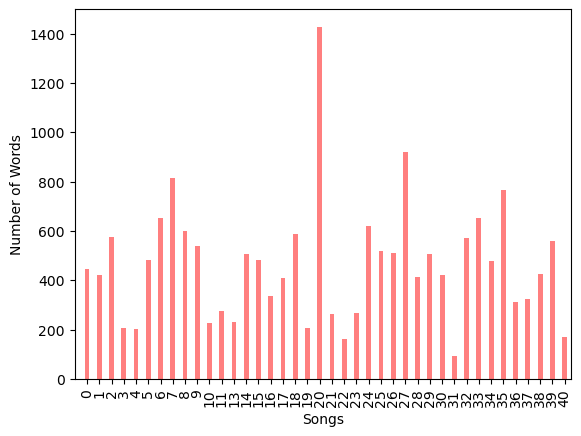

In [53]:
len_words= len(words_df.index)
x_axis = np.arange(0, len_words)

# List
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
print(tick_locations)

# Finish the plot
plt.bar(x_axis,words_df["Number of Words"],facecolor="r", alpha=0.5,width = 0.4)

#To specify the xvalues, (x locations, labels)
plt.xticks(tick_locations,words_df.index,rotation="vertical")
plt.xlim(-1, len_words-192.5)

#no_words_chart = words_counts.plot.bar()
plt.xlabel("Songs")
plt.ylabel("Number of Words")
plt.show()

Text(0, 0.5, 'Number of Words')

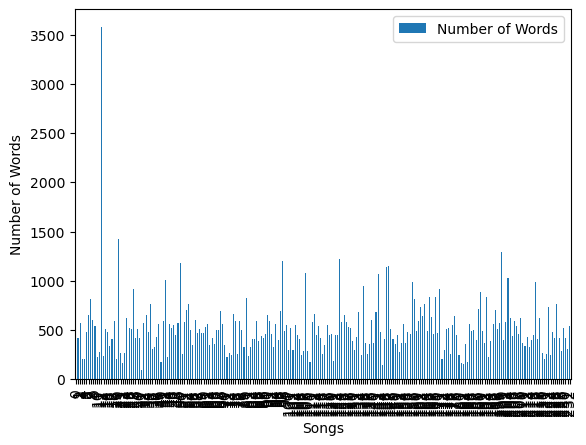

In [18]:
no_words_chart = words_df.plot.bar()
plt.xlabel("Songs")
plt.ylabel("Number of Words")